1) import data
2) EDA - Null values, data types, duplicated, Label encoding, normalisation
3) Data cleaning - remove features if needed
4) build model
5) evaluate model with test data
6) visualization

In [1]:
import pandas as pd

In [2]:
salary_train= pd.read_csv("SalaryData_Train.csv")
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_test= pd.read_csv("SalaryData_Test.csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary_test.duplicated().sum()

930

In [9]:
test1=salary_test.drop_duplicates()
test1.duplicated().sum()

0

In [10]:
salary_train[salary_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [11]:

salary_train[salary_train.index.isin([30157])]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [12]:
salary_train[salary_train.index.isin([30159])]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
train1 = salary_train.drop_duplicates()

In [14]:
train1.duplicated().sum()

0

In [15]:
train1.shape

(26903, 14)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label=train1.apply(LabelEncoder().fit_transform)

In [18]:
label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,1
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,0
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0


In [19]:
label_test=test1.apply(LabelEncoder().fit_transform)

In [20]:
label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,1
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,0
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0


In [21]:
x=label.drop(columns=["education","maritalstatus","native","Salary","race","relationship","sex"])
y=label.iloc[:,13]


In [22]:
x

,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek
0,22,5,12,0,24,0,39
1,33,4,12,3,0,0,12
2,21,2,8,5,0,0,39
3,36,2,6,5,0,0,39
4,11,2,12,9,0,0,39
...,...,...,...,...,...,...,...
30154,36,2,13,3,0,0,39
30155,5,2,9,10,0,0,39
30156,10,2,11,12,0,0,37
30158,41,2,8,0,0,0,39


In [23]:
x_test=label_test.drop(columns=["education","maritalstatus","native","Salary","race","relationship","sex"])
y_test=label_test.iloc[:,13]

In [24]:
x_test

,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek
0,8,2,6,6,0,0,39
1,21,2,8,4,0,0,49
2,11,1,11,10,0,0,39
3,27,2,9,6,87,0,39
4,17,2,5,7,0,0,29
...,...,...,...,...,...,...,...
15055,16,2,12,9,0,0,39
15056,22,2,12,9,0,0,35
15057,21,2,12,9,0,0,49
15058,27,2,12,0,73,0,39


In [25]:
#pip install seaborn


In [26]:
import seaborn as sns

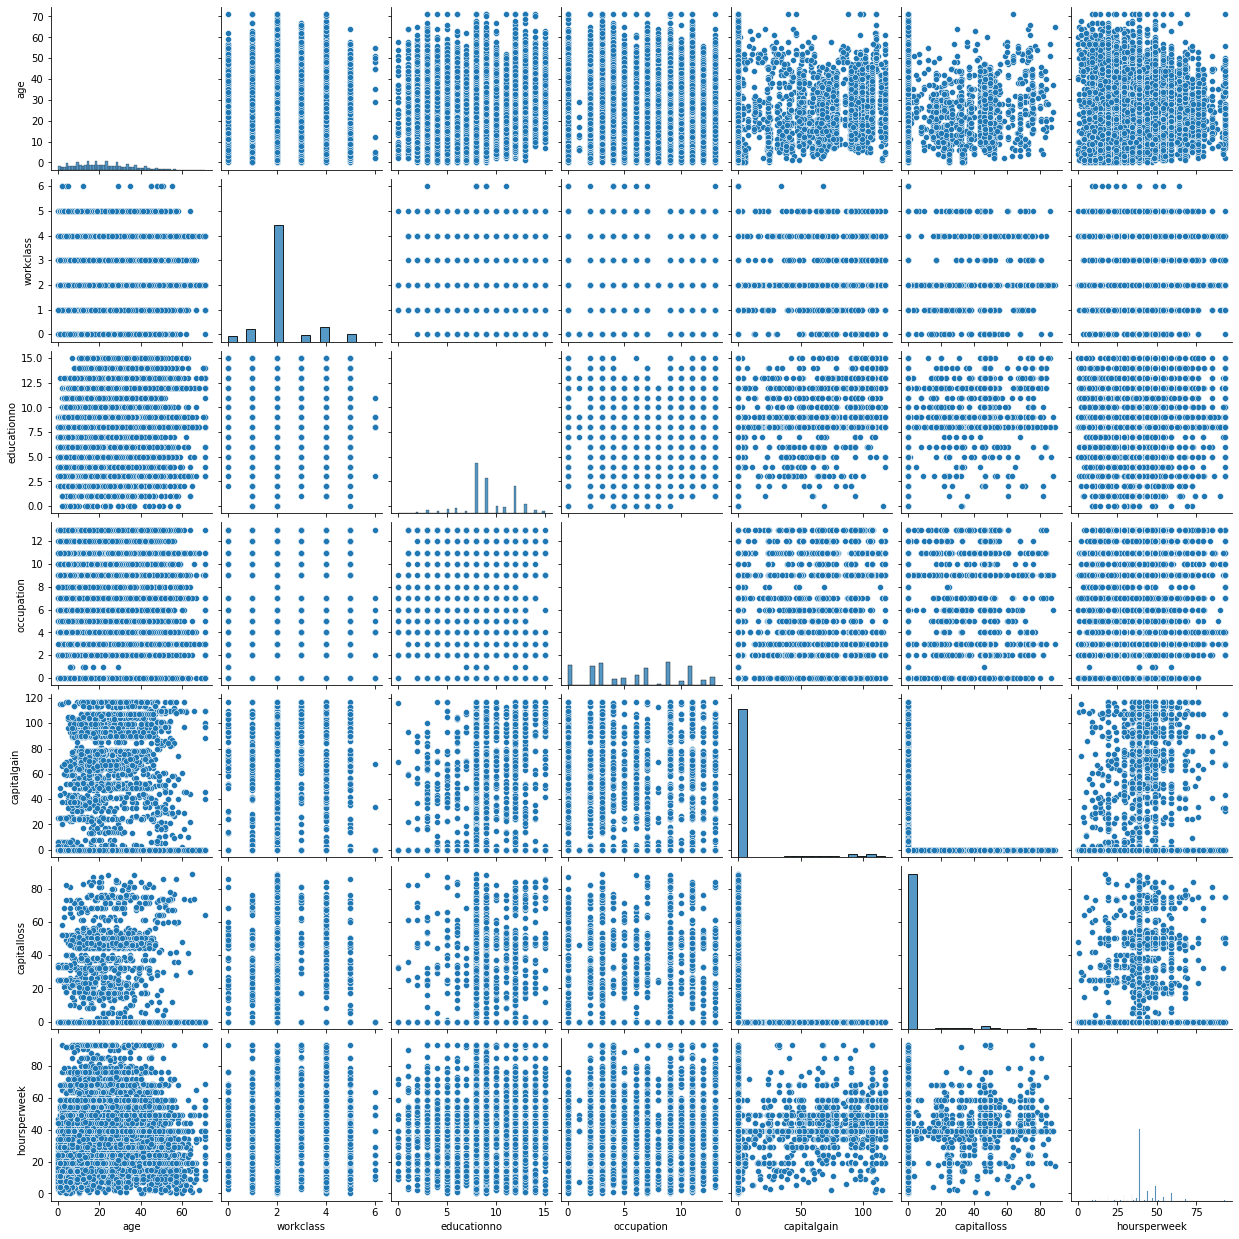

In [39]:

sns.pairplot(x)

In [28]:
#model
from sklearn.naive_bayes import GaussianNB as GB

model1=GB()
model1.fit(x,y)

GaussianNB()

In [29]:
pred1=model1.predict(x_test)

In [30]:
import numpy as np
accuracy = np.mean(pred1==y_test)

In [31]:
accuracy

0.7909412597310687

In [32]:
pred1

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
# drop features

label.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075270,0.002737,0.038061,-0.245289,-0.004535,-0.231271,0.040505,0.070475,0.120689,0.059761,0.073188,0.010646,0.223690
workclass,0.075270,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.017894,0.007480,0.045480,0.012683,0.016577
education,0.002737,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.039066,0.020039,0.059359,0.076605,0.090094
educationno,0.038061,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.156297,0.084397,0.147659,0.096279,0.332178
maritalstatus,-0.245289,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.071445,-0.034754,-0.177846,-0.029585,-0.184559
occupation,-0.004535,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.012186,0.010377,0.022319,0.003024,0.050711
relationship,-0.231271,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.101989,-0.073025,-0.251199,-0.006126,-0.247438
race,0.040505,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.036751,0.031484,0.056922,0.118907,0.079109
sex,0.070475,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.086947,0.057092,0.230841,-0.004930,0.217360
capitalgain,0.120689,0.017894,0.039066,0.156297,-0.071445,0.012186,-0.101989,0.036751,0.086947,1.000000,-0.065245,0.099689,0.022577,0.348899


In [34]:
from sklearn.naive_bayes import MultinomialNB as MB

In [35]:
classifier_mb = MB()
classifier_mb.fit(x,y)
test_pred_mb = classifier_mb.predict(x_test)
accuracy_test_mb = np.mean(test_pred_mb==y_test) 


In [36]:
accuracy_test_mb

0.7789101203113942

In [41]:
# normalize features for Gaussian NB
from sklearn.preprocessing import StandardScaler

In [48]:
std=StandardScaler()
temp1=std.fit_transform(label)


In [50]:
temp1=pd.DataFrame(temp1)

In [51]:
temp1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.003534,2.791383,-0.324519,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.683220,-0.218633,-0.090571,0.282414,-0.586178
1,0.831135,1.788156,-0.324519,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.298424,-0.218633,-2.317845,0.282414,-0.586178
2,-0.079413,-0.218299,0.192999,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.298424,-0.218633,-0.090571,0.282414,-0.586178
3,1.058772,-0.218299,-2.394592,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.298424,-0.218633,-0.090571,0.282414,-0.586178
4,-0.838203,-0.218299,-0.324519,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.298424,-0.218633,-0.090571,-4.979105,-0.586178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1.058772,-0.218299,0.451758,1.471583,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.298424,-0.218633,-0.090571,0.282414,1.705966
26899,-1.293477,-0.218299,1.228036,-0.055073,0.939836,0.980030,-0.277736,0.406417,0.705589,-0.298424,-0.218633,-0.090571,0.282414,-0.586178
26900,-0.914082,-0.218299,-0.842037,0.708255,-0.368576,1.476709,2.193341,0.406417,-1.417255,-0.298424,-0.218633,-0.255554,0.282414,-0.586178
26901,1.438167,-0.218299,0.192999,-0.436737,2.248248,-1.503368,1.575572,0.406417,-1.417255,-0.298424,-0.218633,-0.090571,0.282414,-0.586178


In [57]:
x1=temp1.drop([2,4,6,7,8,12,13],axis=1)


In [58]:
x1

,0,1,3,5,9,10,11
0,-0.003534,2.791383,1.089919,-1.503368,0.683220,-0.218633,-0.090571
1,0.831135,1.788156,1.089919,-0.758349,-0.298424,-0.218633,-2.317845
2,-0.079413,-0.218299,-0.436737,-0.261669,-0.298424,-0.218633,-0.090571
3,1.058772,-0.218299,-1.200065,-0.261669,-0.298424,-0.218633,-0.090571
4,-0.838203,-0.218299,1.089919,0.731690,-0.298424,-0.218633,-0.090571
...,...,...,...,...,...,...,...
26898,1.058772,-0.218299,1.471583,-0.758349,-0.298424,-0.218633,-0.090571
26899,-1.293477,-0.218299,-0.055073,0.980030,-0.298424,-0.218633,-0.090571
26900,-0.914082,-0.218299,0.708255,1.476709,-0.298424,-0.218633,-0.255554
26901,1.438167,-0.218299,-0.436737,-1.503368,-0.298424,-0.218633,-0.090571


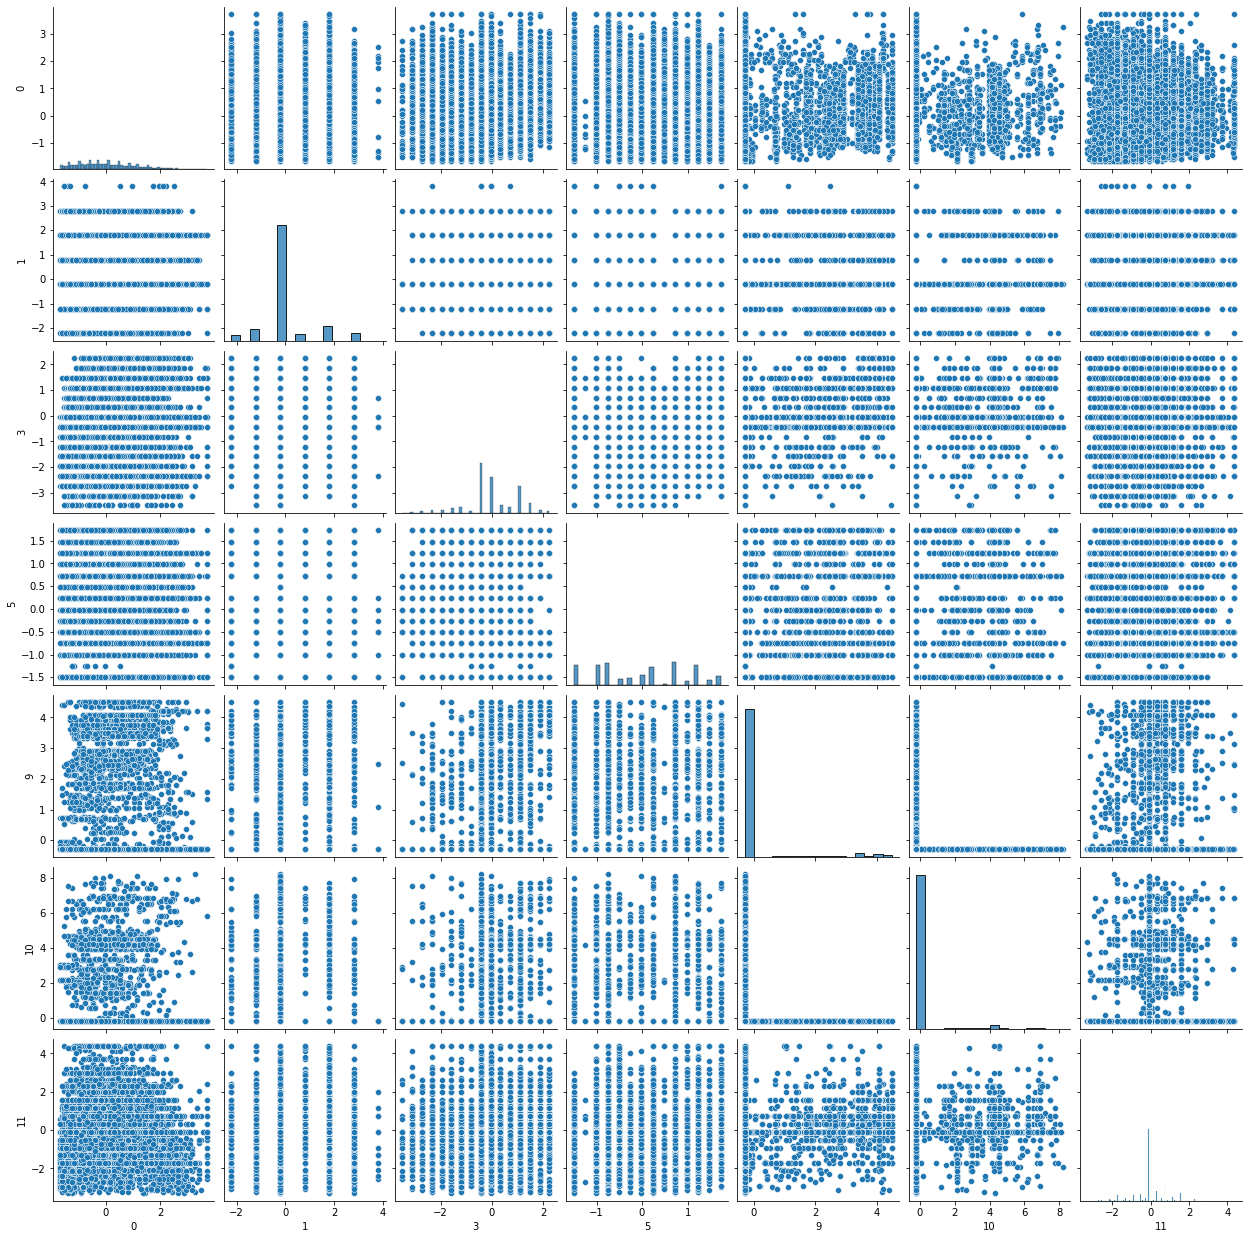

In [60]:
sns.pairplot(x1)

In [62]:
y1=temp1.iloc[:,13]


In [66]:
y1=pd.DataFrame(y1)
y1

,13
0,-0.586178
1,-0.586178
2,-0.586178
3,-0.586178
4,-0.586178
...,...
26898,1.705966
26899,-0.586178
26900,-0.586178
26901,-0.586178


In [70]:
y1=y1.astype('int')

In [71]:
model_gaussian=GB()
model_gaussian.fit(x1,y1)

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [72]:
#standarddise test data
temp2=std.fit_transform(label_test)

In [74]:
temp2=pd.DataFrame(temp2)
temp2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.054318,-0.228774,-2.385475,-1.199146,0.925446,-0.013463,0.989324,-1.960265,0.703170,-0.288097,-0.212091,-0.084114,0.269504,-0.574899
1,-0.085984,-0.228774,0.200867,-0.430644,-0.386868,-0.510789,-0.888332,0.395254,0.703170,-0.288097,-0.212091,0.747605,0.269504,-0.574899
2,-0.830856,-1.237065,-0.833670,0.722109,-0.386868,0.981190,-0.888332,0.395254,0.703170,-0.288097,-0.212091,-0.084114,0.269504,1.739437
3,0.360939,-0.228774,1.235404,-0.046393,-0.386868,-0.013463,-0.888332,-1.960265,0.703170,3.641255,-0.212091,-0.084114,0.269504,1.739437
4,-0.383933,-0.228774,-2.644109,-1.583397,0.925446,0.235200,-0.262447,0.395254,0.703170,-0.288097,-0.212091,-0.915832,0.269504,-0.574899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,-0.458420,-0.228774,-0.316401,1.106360,0.925446,0.732527,0.989324,0.395254,0.703170,-0.288097,-0.212091,-0.084114,0.269504,-0.574899
14126,-0.011497,-0.228774,-0.316401,1.106360,-1.699183,0.732527,-0.262447,0.395254,-1.422132,-0.288097,-0.212091,-0.416801,0.269504,-0.574899
14127,-0.085984,-0.228774,-0.316401,1.106360,-0.386868,0.732527,-0.888332,0.395254,0.703170,-0.288097,-0.212091,0.747605,0.269504,-0.574899
14128,0.360939,-0.228774,-0.316401,1.106360,-1.699183,-1.505441,0.989324,-3.138024,0.703170,3.008945,-0.212091,-0.084114,0.269504,-0.574899


In [75]:
x2=temp2.drop([2,4,6,7,8,12,13],axis=1)


In [87]:
x2.shape

(14130, 7)

In [76]:
y2=temp2.iloc[:,13]


In [88]:
y2.shape

(14130, 1)

In [77]:
y2=pd.DataFrame(y2)


In [78]:
y_pred_gaus=model_gaussian.predict(x2)

In [90]:
pred_temp=y_pred_gaus.reshape(14130,1)

In [91]:
len(pred_temp)

14130

In [92]:
acc_gaus=np.mean(y_pred_gaus==pred_temp)

In [93]:
acc_gaus

0.7860741201531227

In [ ]:
# multinomial NB - standardize 

In [98]:
from sklearn.preprocessing import LabelEncoder

In [100]:
l_temp1=temp1.apply(LabelEncoder().fit_transform)
l_temp2=temp2.apply(LabelEncoder().fit_transform)

In [103]:
l_temp1_x=l_temp1.iloc[:,:13]


In [104]:
l_temp2_x=l_temp2.iloc[:,:13]


In [105]:
l_temp1_y=l_temp1.iloc[:,13]
l_temp2_y=l_temp2.iloc[:,13]

In [106]:
classifier_mb_new = MB()
classifier_mb_new.fit(l_temp1_x,l_temp1_y)


MultinomialNB()

In [107]:
test_pred_mb_new = classifier_mb_new.predict(l_temp2_x)
accuracy_test_mb_new = np.mean(test_pred_mb_new==l_temp2_y) 



In [108]:
accuracy_test_mb_new 

0.7789808917197453

In [109]:
# Min Max Scaling ( which squishes the range from 0-1 )
# Standard Scaling ( which makes the mean=0 and standard deviation =1 )
# With standardization the mean and stddev changes, but probabilities stay exactly the same, and thus classification results. In essence Gaussian Naive Bayes performs standardization internally.